I need to weave in info from: https://pca4ds.github.io/

Dimensionality Reduction Methods, used to condense and identify your important features, can also be run before running FEATURE ENGINEERING** **bold text**

--Data Items that impact the model/proprocessing steps needed before running PCA:

*  Missing Values
*  Distribution
*   Multicollinearity
*   Metrics Differences/Units of Measurement differences

MISSING - like w regression, you will need to omit the entire row if there is a missing value in the variables. Your choices to correct are omit or impute.
 DISTRIBUTION - linearity and symmetry (Your choices to correct - non linear models limit the application of PCA, USE tSNE),
 Multicollinearity - Will overpower and become the first primary component if you do not remove/check for Multicollinearity before scaling/standardizing***,(Your choices to correct -reduce or combine. remove variables causing multicollinearity or combine them into a single variable)
 Unit of Measurement/Distance Differences (scale your data).

In [ ]:
# Step 1: Preprocessing, library import
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.6 MB/s eta 0:00:00


In [ ]:
 #Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

# To perform K-Means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import your data file:
data = pd.read_csv("fpl_data.csv")
pd.get_option("display.max_columns")

In [ ]:
#PReprocessing, whats up with your data:
data.shape

(476, 13)

In [ ]:
display(data)


,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5


In [ ]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
# Checking datatypes and number of non-null values for each column
df.info()

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

In [ ]:
# Checking for missing values
df.isnull().sum()

EDA Sumamry Stats

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Alex Runnarsson,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


Visualization Functions:
Boxpot Distribution combo (continuous)
Labeled Barplots (categorical)

In [ ]:
# Function to plot a boxplot and a histogram along the same scale;
# visual check of the distribution and outliers in one step
# do this across all your continuous variables:


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

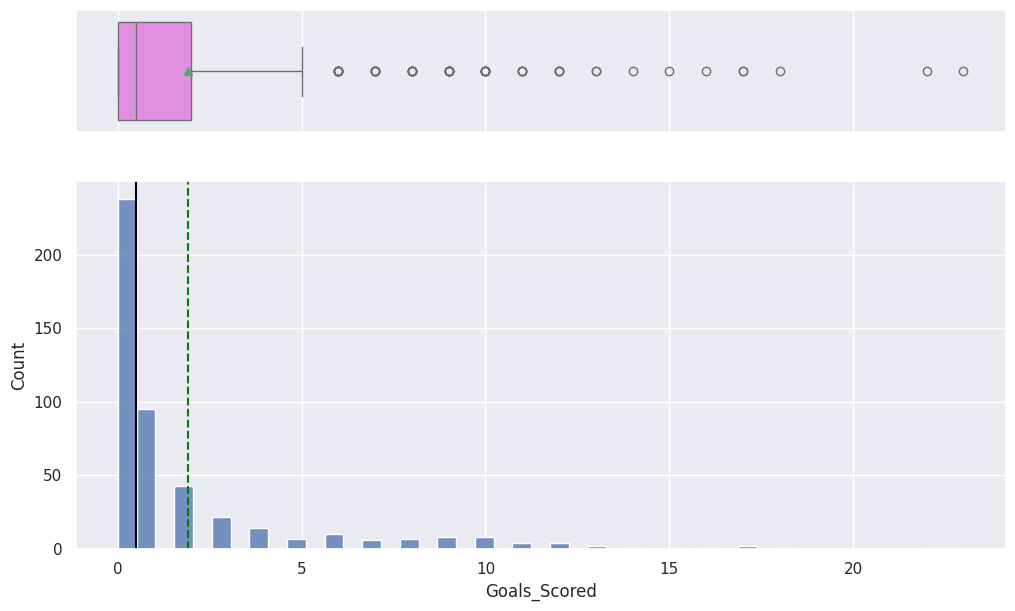

In [ ]:
histogram_boxplot(df, 'Goals_Scored')

In [ ]:
# Function to create labeled barplots, Categorical and Count Distribution Check:


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

Applying the function to your data: just change the variable.

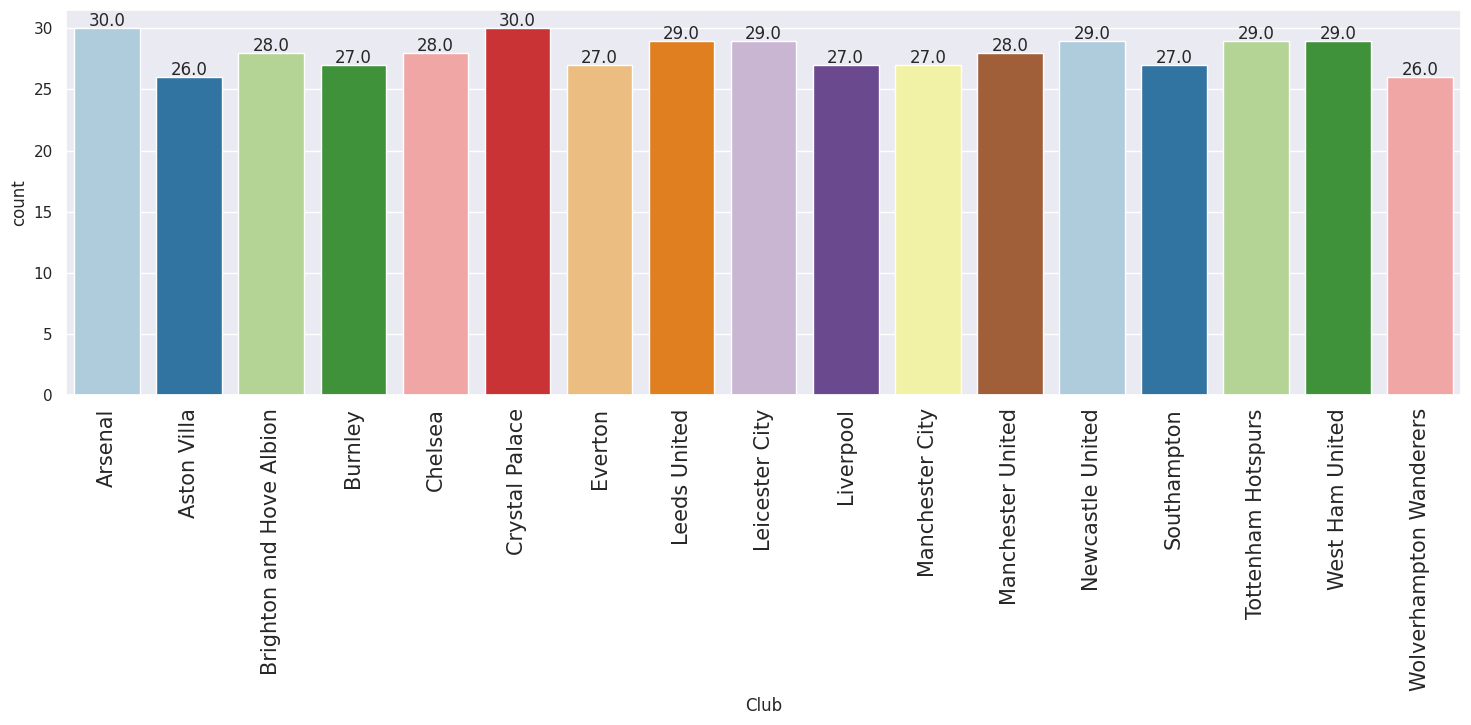

In [ ]:
labeled_barplot(df, 'Club')

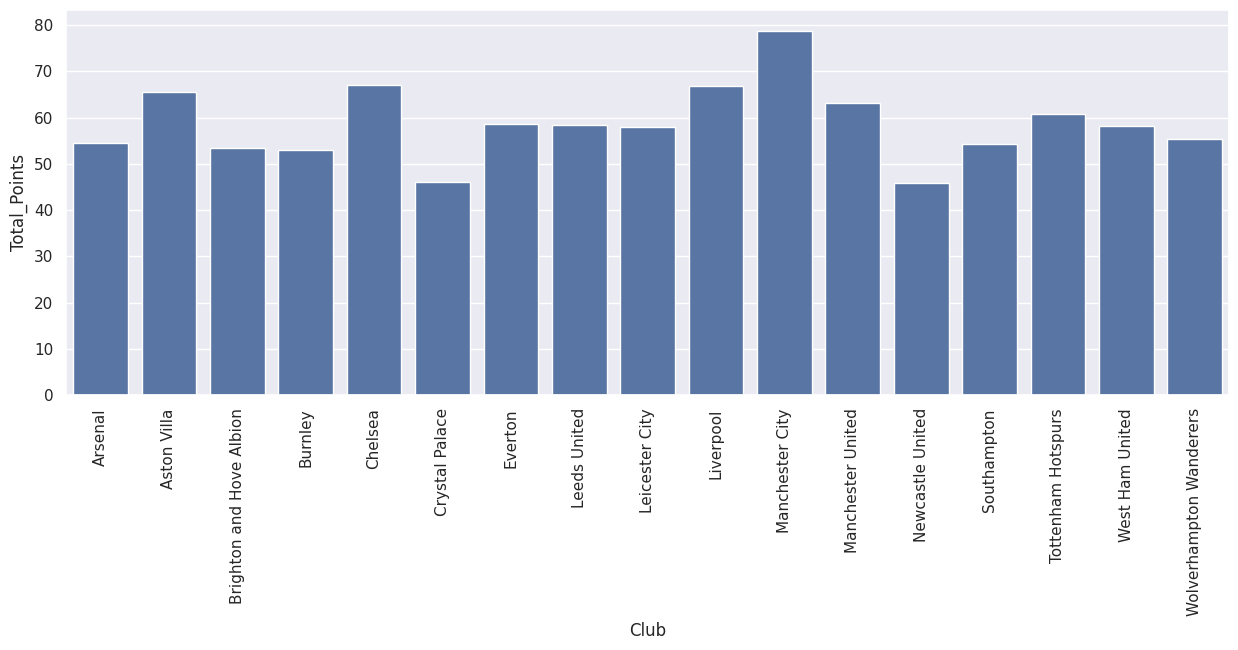

In [ ]:
#Total POINTS BY CLUB --> Categorical and Continuous variable relationships/structure checks
#take your significant variables and see if there are explanable patterns across the categorical variables.
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'Club', y = 'Total_Points', errorbar=('ci', False))
plt.xticks(rotation = 90)
plt.show()

In this Python code snippet, `df_aux` is a temporary DataFrame used for filtering data within a loop. Let's break down what the code does:

1. `pos_list = df.Position.unique().tolist()`: This line extracts unique values from the 'Position' column of DataFrame `df` and converts them into a list. Each unique position in the 'Position' column will be iterated over in the subsequent loop.

2. `best_df = pd.DataFrame()`: This line initializes an empty DataFrame called `best_df` which will store the filtered data.

3. The `for` loop iterates over each unique position (`pos`) in `pos_list`.

4. Inside the loop:
   - `df_aux = df[df.Position == pos]`: This line filters the original DataFrame `df` to create a temporary DataFrame `df_aux` containing only rows where the 'Position' column matches the current position (`pos`).
   - `df_aux[df_aux.Total_Points == df_aux.Total_Points.max()]`: This filters `df_aux` further to select only rows where the 'Total_Points' column is equal to the maximum value of 'Total_Points' within `df_aux`.
   - `[['Player_Name', 'Club', 'Position', 'Total_Points']]`: This selects only the columns 'Player_Name', 'Club', 'Position', and 'Total_Points' from the filtered `df_aux`.
   - `best_df = pd.concat([best_df, ...])`: This concatenates the filtered DataFrame from `df_aux` (filtered for the current position and maximum total points) with the existing `best_df`. The result is reassigned to `best_df`.

5. Finally, `best_df` contains the filtered DataFrame with the players having the highest total points for each position.

So, essentially, `df_aux` is a temporary DataFrame used for filtering and selecting data within each iteration of the loop, and the results are accumulated in `best_df`. At the end of the loop, `best_df` contains the desired filtered data.

In [ ]:
#For loop example,
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = pd.concat([best_df, df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']]])

best_df

**Principle Components Analysis Steps: **

Step 1: MIssing Values Check - With PCA, like with regression, you need full records. YOu're gonna have to either drop your whole ass row w (a) missing record(s) or impute values for the missing row record(s).

Step Bivariate Analysis
-Correlations
-By analysis

Youre checking out the relationships between the fucking variables, you're ultimatley trying to suss out any multicollinearity (reduce/combine variables when this happens) or correlation/relationship math that's gonna fuck up the overall math, you're evaluating if outliers are possible and should be included in the relationships. You're prepping the data, because Missing and Outliers impact methods differently/ seem to be the determining factor of when to use some different methods; I think this is the whole "non parametric equivalent" standard to the normal distribtion methods - these checks for outliers and nulls help you decide on which method to use - i.e. I think K means is sensitive to outliers, so you use the other one have to go through ntoes the outliers might be more for the Supervised methods kmeans vs kmediods**  

In [ ]:
# Imputing missing values with mode for the Weather column and with median for all other columns
for col in data_air_pol.columns:

    if col == "Weather":
        data_air_pol[col].fillna(value = data_air_pol[col].mode()[0], inplace = True)

    else:
        data_air_pol[col].fillna(value = data_air_pol[col].median(), inplace = True)

Step: **Outliers Check**

Do you keep or exclude your outliers? Outliers can determine the method you have to use/ will mess up linear methods, you will need to swap for less sensitive non parametrics when you want to include outliers. Remember, always ask if the outlier is valid for the analysis you're running. [basically is shaq's shoe size something that will add value ot your analysis - are you looking at the range of sizes you should be offering, trying to target underserved segments, idfk, whatever)

In [ ]:
#Boxlpots everything
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):

    plt.subplot(2, 5, i + 1)

    plt.boxplot(df[variable], whis = 1.5)

    plt.tight_layout()

    plt.title(variable)

plt.show()

Correlations

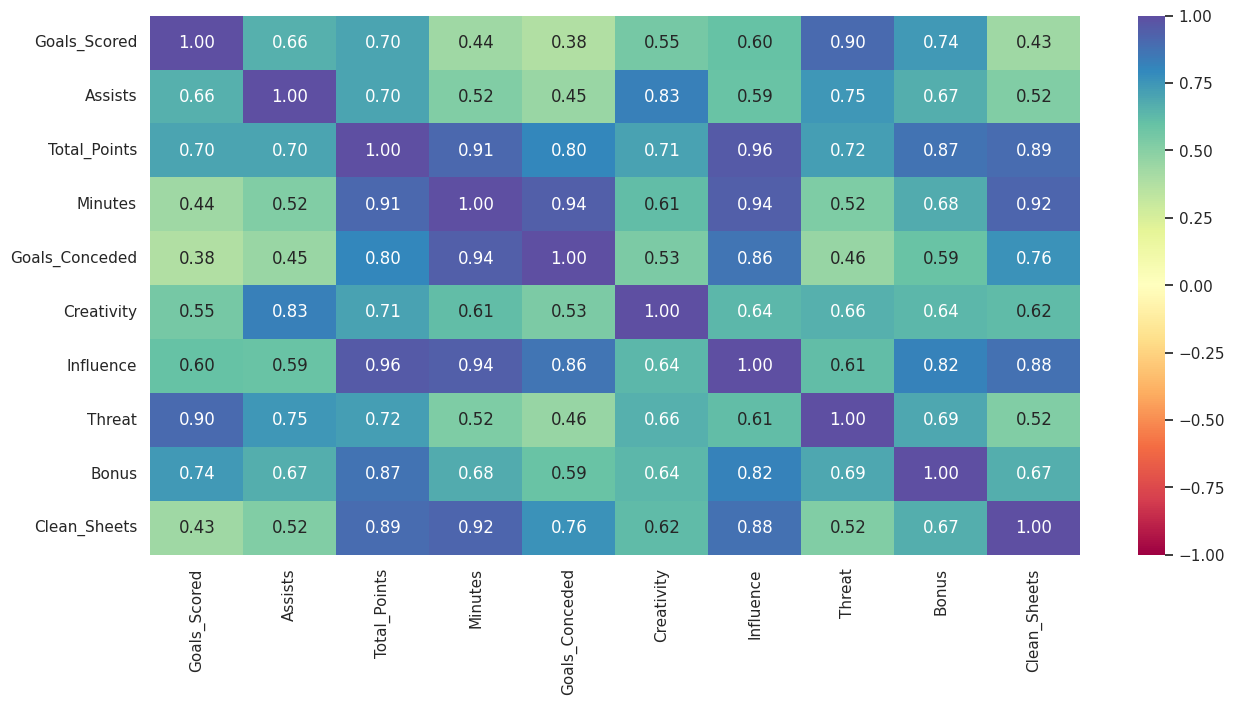

In [ ]:
# Correlation check - Two continuous***
#below line seems to be amazing, will group your numeric column types together into a new list/frame/whatever so you can run correlation easier/data cleaning and variable selection wise in python
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()


------
#Just another view of running the options w/out creating the numeric to list col list.
plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

STep 2: Scale your data/Normalization

In [ ]:
#Scale your data: THis is just a simplified version of the second code:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_scaled.head()

Scaling for Distance Based Algorithms: i.e. UNSUPERVISED LEARNING - PCA

In [ ]:
# Scaling the data before clustering
scaler = StandardScaler()
subset = df.iloc[:, 3:].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

Principle Components Analysis:Dimensionality Reduction Method

> PCA can help to** mitigate the effects of collinearity** by identifying the most important variables or features that explain the maximum variance in the data. The principal components generated by PCA are uncorrelated with each other, which can reduce the redundancy in the data and can make the clustering more robust.



> Spectral Decomposition Theorem -> Maximize Projection Variance : this is why Eigenvalues/Vectors are the bread and butter of PCA.

How do you find the  PCAs: Use the Eigenvectors that correspond to the largest eigenvalues in the covariance matrix
***Keep all the variables with an Eigenvalue > 1 **bold text** Or that explain at least 70% of Variance (This % can also be industry dependent/research dependent)


> Use the Covariance Matrix when the units are the same/ for variables w  0 1 features, use the Correlation matrix when different units are used; standard scalar of your variables** distance methods and the impact of distnace**





In [ ]:
# Importing PCA
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = subset.shape[1]                                                 # Storing the number of variables in the data

pca = PCA(n_components = n, random_state = 1)                       # Storing PCA function with n components

data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df ))       # Applying PCA on scaled data

# The percentage of variance explained by each principal component is stored
exp_var = (pca.explained_variance_ratio_)

Determine your # of PCA:
Explained Variances by Components

In [ ]:
# ELBOW method - check the plot, keep everything before the "BEND"
#Plotting the explained cumulative variance by principal components
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# When the bend isn't clearly defined, you can use the variance as a threshold or Eigenvalues > 1
#Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.70):

        print("Number of PCs that explain at least 70% variance:", ix + 1)
        break

In [ ]:
#Now, let us look at these principal components as a linear combination of the original features.
#make a new dataframe with the Principle COmponents:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

In [ ]:
#highlight any PCAs w a threshold of whatever you decide:
def color_high(val):

    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'

    elif val > 0.25:
        return 'background: skyblue'

data_pca.T.style.map(color_high)

In [ ]:
#Visualize the relationship between Principle Components (2 variables/PCs)
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**tSNE**

Non Linear Methods: Stochastic Neighbor Embedding (tSNE) -> non convex optimization procedure, scikit-learn.orgstableauto_examplesmanifoldplot


> You have to run PCA and reduce the number of dimensions before you can run tSNE


> Performance of the models depends on the shape of the data. Use this on non- linear data*





2D Visualization

In [ ]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled)

In [ ]:
# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])

In [ ]:
# Scatter plot for two components
plt.figure(figsize = (7,7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

3D Visualization

In [ ]:
# Fitting t-SNE with number of components equal to 3
tsne = TSNE(n_components = 3, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled)

In [ ]:
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2', 'X3'])

In [ ]:
# Scatter plot for all three components
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111, projection = '3d')

x = data_tsne['X1']

y = data_tsne['X2']

z = data_tsne['X3']

ax.scatter(x, y, z)

plt.show()

We know that t-SNE preserves the local structure of the data while embedding the data from high dimensions to low dimensions.
Here, we have generated the 2D and 3D embeddings for the data. We can see that there is no pattern in the data - it is scattered and clustered together with the exception of some outliers.
Let's try different perplexity values to visualize the data in 2D.

In [ ]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    data_tsne = tsne.fit_transform(data_scaled)

    data_tsne = pd.DataFrame(data_tsne)

    data_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7, 7))

    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

    plt.title("perplexity = {}".format(i))

All the plots with different perplexity values imply that there is no underlying pattern in the data.
This shows that observing patterns in data projection and visualization techniques like PCA and t-SNE, is actually dependent on the nature of the data. Let's look at the implementation of PCA and t-SNE on another dataset.

**Clustering Methods: **

K-Means Clustering
K-Means clustering is one of the most popular clustering algorithms used for partitioning a dataset into K clusters. The algorithm works by iteratively assigning each data point to one of the K clusters based on the proximity of the data points to the centroids of the clusters. K-Means clustering is a computationally efficient algorithm that can work well even for datasets with a large number of variables.

In addition to the Can be also used to determine the number of principle componenets to keep in a PCA analysis.

The steps involved in K-Means clustering are as follows:

Choose the number of clusters K that you want to partition the data into.
Initialize the K centroids randomly.
Assign each data point to the nearest centroid.
Recalculate the centroids of each cluster as the mean of all the data points assigned to it.
Repeat steps 3 and 4 until the centroids no longer change or a maximum number of iterations is reached